![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def veryclose(a, b): return np.isclose(a, b, atol=1e-12, rtol=1e-12)

# A convergência do método de Newton

## Questão 1: Lista de iterados do método de Newton

Dê abaixo o método de Newton, começando a partir do ponto x0, e retornando a lista de todos os pontos gerados.
O método para quando:
- ou o tamanho do passo é menor do que `atol`;
- ou o tamanho do passo, relativo ao (valor absoluto do) próximo iterado, é menor do que `rtol`;
- ou forem realizadas mais do que `maxiter` iterações.

In [3]:
def newton(f, df, x, atol=1e-8, rtol=1e-8, maxiter=100):
    a=f(x)
    r=1
    i=0
    l=[x]
    while True:
        if a<atol or r<rtol or i>maxiter:
            break
        dx = f(x)/df(x)
        newx= x-dx
        a=abs(newx-x)
        r=abs((newx-x)/newx)
        l.append(newx)
        i+=1
        x=newx
    return l

In [4]:
L = newton(np.sin, np.cos, 3)
assert len(L) == 4
assert np.isclose(L[-1], np.pi)

In [5]:
assert np.isclose(L[-2], np.pi)
assert not veryclose(L[-2], np.pi)

In [6]:
def poly1(x):
    return x**3 - x + 1

Dê a derivada da função acima

In [7]:
def d_poly1(x):
    return 3*(x**2)-1

In [8]:
L = newton(poly1, d_poly1, 1, atol=1e-9)
assert len(L) == 22
assert abs(poly1(L[-1])) < 1e-8

## Questão 2: Olhando uma convergência

Observe o gráfico dos iterados produzidos pelo método.
Como se deu a convergência?

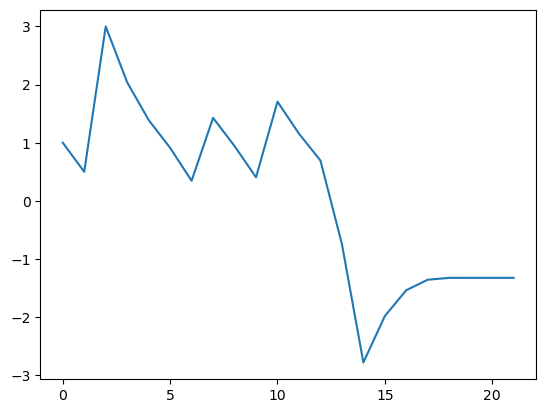

In [9]:
plt.plot(L)

Bom, o gráfico nos mostra como a função vai "chutando os valores pra tentar chegar proximo do valor da raiz, até que ela encontra um valor proximo do da raiz e vai tendendo ao valor da raiz

Faça um gráfico da função polinomial que ajude a entender porque isso aconteceu.

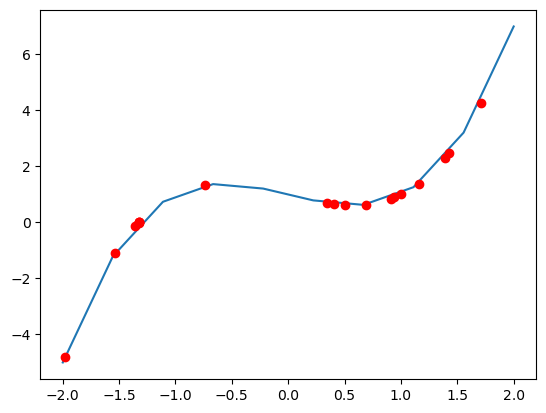

In [10]:
x=[]
y=[]
ts=np.linspace(-2,2,10)
for i in L:
    if -2<i<2:
        x.append(poly1(i))
        y.append(i)
plt.plot(ts,poly1(ts))
plt.plot(y,x,"ro")
ax = plt.gca()

In [11]:
l = ax.lines[0]

valores = l.get_ydata()
assert -8 < min(valores) < -1
assert 10 > max(valores) > 2

O que você deduz?

como falei na questão anterior, ela  vai pegando os pontos tangentes do ponto mais alto e vai dimuindo, se olharmos pro ponto x=1,7 conseguimos observar direitinho q o proximo pnoto de tangencia é um valor muito proximo de x=1,5, como o proprio metodo de newton funciona

## Pontos periódicos

É possível que, após 2 iterações do Método de Newton, estejamos próximos do ponto inicial.
Se "acertarmos a mira", voltaremos exatamente ao ponto inicial.

## Questão 3: Equação de pontos periódicos

Determine uma equação **polinomial** que é satisfeita por um ponto 2-periódico para o método de Newton,
aplicado à função polinomial $x^3 - x + 1$.

Sugestão:
- Primeiro, deixe em função de uma variável $y$ que representa o "próximo ponto", e simplifique o que puder.
- Em seguida, substitua $y = N(x)/D(x)$, e elimine os denominadores para obter um polinômio. 

Depois de muita ajuda do symbolab eu cheguei a:
como $y = x-(f(x))/f´(x)$
temos $y = (2.x^3-1)/3.x^2-1$
com isso n(x)=2.x^3-1 e d(x)=3.x^2-1
p(x)=x.d(x).(3*(n(x))^2−d(x)^2)−2.(n(x))^3+(d(x))^3
com . sendo multiplicação e ^ potenciação

Qual o grau deste polinômio?

como temos (3x^3-1)^3 temos um polinomio de grau 9

Agora, defina este polinômio.

Dica: use o numerador e denominador como variáveis intermediárias!

In [12]:
def periodo2(x):
    n=2*(x**3)-1
    d=3*(x**2)-1
    return x*(3*d*(n**2)-(d**3))-2*(n**3)+(d**3)

In [13]:
assert 0.1 < periodo2(1/np.sqrt(3)) < 10

## Questão 4: Análise dos pontos de período 2

Faça um gráfico deste polinômio.

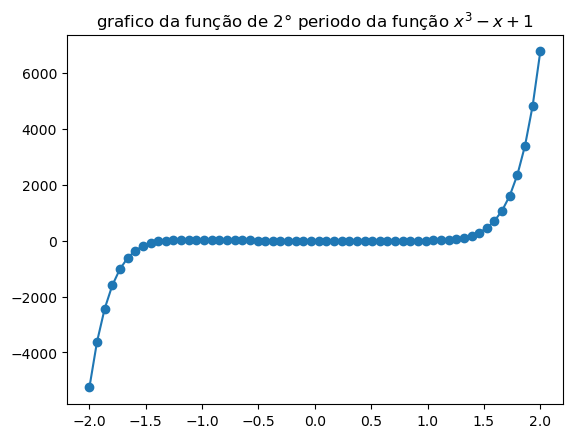

In [20]:
x=np.linspace(-2,2,60)
y=periodo2(x)
plt.title('grafico da função de 2° periodo da função $x^3-x+1$')
plt.plot(x,y,marker='o')

Faça mais um gráfico, que (junto com o anterior) convença você que este polinômio só tem uma raiz.

Text(0.5, 1.0, 'Comparação')

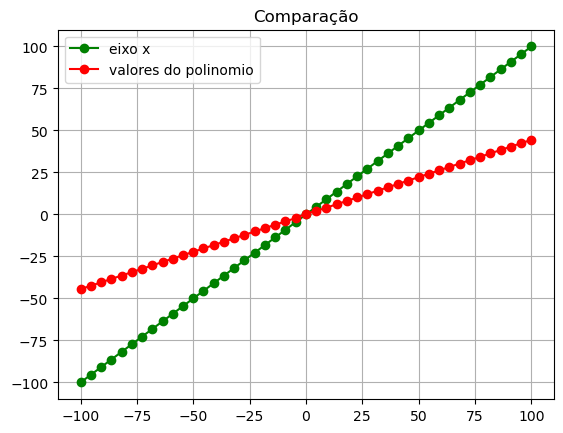

In [15]:
x=np.linspace(-100,100,45)
N=2*(x**3)-1
D=3*(x**2)-1
y1=x
y2=(2*(N**3)-(D**3))/(3*D*(N**2)-(D**3))
plt.plot(x,y1,color='green',marker='o', label='eixo x')
plt.plot(x,y2,color='red',marker='o', label='valores do polinomio')
plt.legend()
plt.grid()
plt.title('Comparação')

Que raiz é esta?
Porque este ponto de período 2 faz sentido?

Como o grafico do polinomio é uma reta e ele só pode cortar o eixo x uma vez, e necessariamente precisa ser em 0. E o 2° periodo funciona pois a reta são constantes e criam uma reflexão entre os negativos e positivos.


## Questão 5: Zeros duplos

Vamos usar Newton fora das hipóteses de convergência quadrática...

In [16]:
def p2(x): return (x - 3)**2
def dp2(x): return 2*x - 6

L = newton(p2, dp2, 4, atol=1e-12, rtol=1e-12)
assert len(L) == 40

Faça um gráfico da convergência dos erros

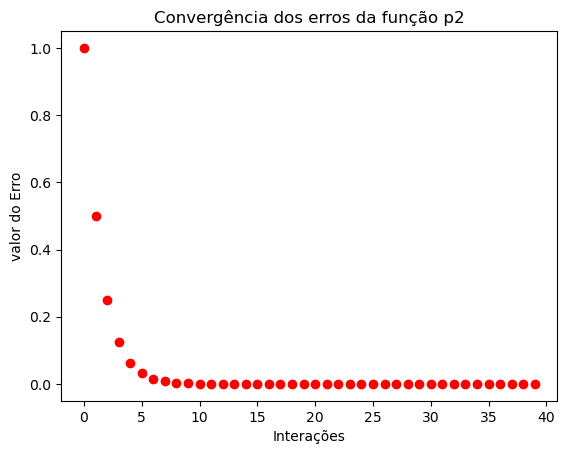

In [17]:
lista=range(len(L))
y=[abs(L[i]-3) for i in lista]
plt.plot(range(len(L)),y,'ro')
plt.title('Convergência dos erros da função p2')
plt.xlabel('Interações')
plt.ylabel('valor do Erro')
ax = plt.gca()

In [18]:
l = ax.get_lines()[0]
values = l.get_ydata()

assert len(values) == 40
assert max(values) == 1
assert min(values) < 1e-10

In [19]:
assert len(ax.get_xlabel()) > 5

Qual a velocidade de convergência destas iterações?

Olhando a lista L, o erro tende a convergir pela formula 1/2^n com n sendo o numero de interações

Qual a fórmula exata do "próximo ponto" para este caso?
Como isso explica o resultado acima?

sendo $E_{n}$ o erro atual, o proximo erro pode ser calculado por $E_{n+1}=E_n-\dfrac{1}{2^n}$